# 数据挖掘互评作业三：分类与预测

## 1.数据预处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import numpy as np
import missingno as msno 
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn import linear_model
from scipy import stats
#pd.set_option('max_colwidth', 25)
csv_file = 'vgsales.csv'
data = pd.read_csv(csv_file,index_col=0)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


首先进行数据预览，可以看出缺失值很少，因此直接删除包含缺失值的项

In [2]:
data.dropna(axis=0, how='any', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


处理完缺失值之后，观察数据集各项属性

Rank - Ranking of overall sales 总销售额排名

Name - The games name 游戏名称

Platform - Platform of the games release (i.e. PC,PS4, etc.) 发布平台

Year - Year of the game's release 发布年份

Genre - Genre of the game 游戏类型

Publisher - Publisher of the game 发行商

NA_Sales - Sales in North America (in millions) 北美销售额

EU_Sales - Sales in Europe (in millions) 欧洲销售额

JP_Sales - Sales in Japan (in millions) 日本销售额

Other_Sales - Sales in the rest of the world (in millions) 其他地区销售额

Global_Sales - Total worldwide sales. 全球总销售额

In [3]:
data.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


## 2.电子游戏市场分析

### 2.1 受欢迎的游戏

首先根据游戏名进行分组，将游戏名相同的数据项的销售总额加在一起，作为这个游戏的总销售额，然后可视化销售额排名前十的游戏名

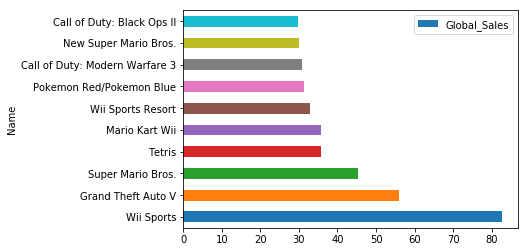

In [4]:
group_name = data.groupby('Name',as_index = False).sum().sort_values(by='Global_Sales',ascending = False)
group_name.head(10).plot.barh(x='Name',y='Global_Sales')

从上图可以看出Wii Sports是最受欢迎的游戏，GTA V是次受欢迎的游戏

### 2.2 受欢迎的游戏类型

首先根据游戏类型进行分组，将游戏类型相同的数据项的销售总额加在一起，作为这个游戏类型的总销售额，然后可视化销售额排名前十的游戏类型

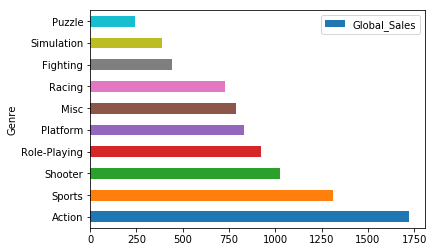

In [5]:
group_genre = data.groupby('Genre',as_index = False).sum().sort_values(by='Global_Sales',ascending = False)
group_genre.head(10).plot.barh(x='Genre',y='Global_Sales')

从上图可以看出动作类游戏是最受欢迎的游戏类型，运动类游戏、射击类游戏以及角色扮演类游戏也很受欢迎

### 2.3 受欢迎的发布平台

首先根据游戏平台进行分组，将游戏平台相同的数据项的销售总额加在一起，作为这个平台的总销售额，然后可视化销售额排名前十的游戏平台

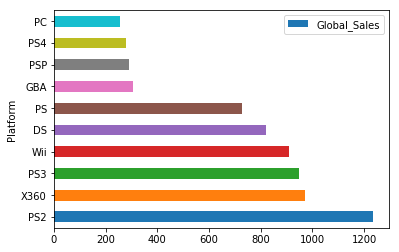

In [6]:
group_platform = data.groupby('Platform',as_index = False).sum().sort_values(by='Global_Sales',ascending = False)
group_platform.head(10).plot.barh(x='Platform',y='Global_Sales')

从上图可以看出PS2是最受欢迎的游戏平台，X360、PS3以及Wii平台也很受欢迎

### 2.3 受欢迎的发布人

In [ ]:
首先根据发布人进行分组，将发布人相同的数据项的销售总额加在一起，作为这个发布人的总销售额，然后可视化销售额排名前十的发布人

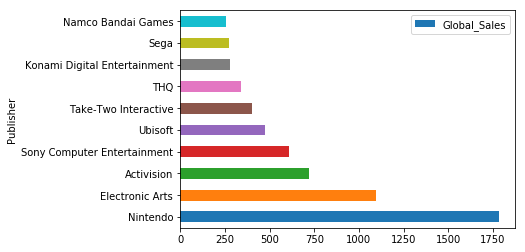

In [7]:
group_publisher = data.groupby('Publisher',as_index = False).sum().sort_values(by='Global_Sales',ascending = False)
group_publisher.head(10).plot.barh(x='Publisher',y='Global_Sales')

从上图可以看出Nintendo是最受欢迎的发布人，Electronic Arts也很受欢迎

## 3.预测每年电子游戏销售额

为了预测每年电子游戏的销售额，首先将每年的销售变化进行可视化，以便观察属性之间的关系，选择合适的模型进行预测分析

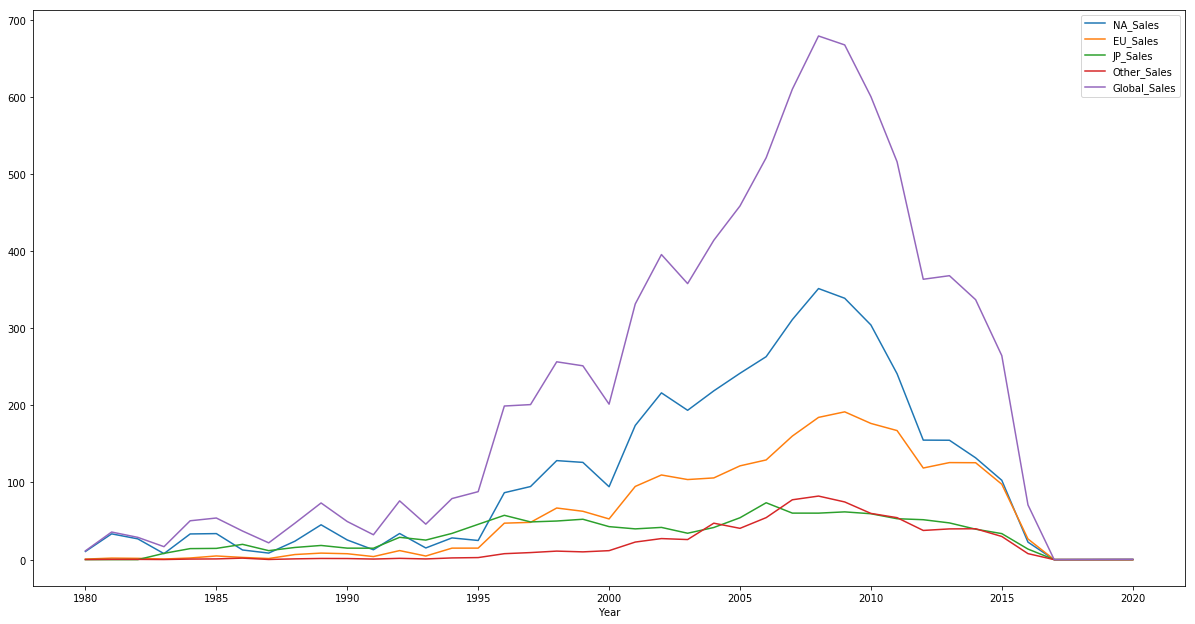

In [9]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
group_years = data.groupby('Year', as_index = False).sum()
group_years.plot(x='Year',ax = ax)

从图中可以看出各地区销售额与总销售额存在线性关系，因此可以采用逻辑斯蒂回归进行总销售额的预测分析，从图中还可以观察出，北美销售额与总销售额的相关性更大，因此利用北美销售额来预测总销售额

In [10]:
x = group_years['NA_Sales'].values.reshape(-1, 1)
y = group_years['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print('Training score: ',train_score)
test_score = model.score(X_test, y_test)
print('Testing score: ',test_score)

Training score:  0.9862909184758805
Testing score:  0.9720345012989452


首先划分训练集和测试集，从总数据集中选取百分之二十的数据作为测试集，利用逻辑斯蒂回归算法集合北美销售额与总销售额的关系，最终测试结果可以看出，训练模型可以很好的预测总销售额

## 4.可视化展示这个销售故事

首先假定一个场景，如果一个游戏团队想要研发一款新游戏，那么应该研发什么类型的游戏，选择什么样的游戏平台以及发行商才能更有前景呢？

因此我们需要了解这些年受欢迎的游戏类型以及游戏平台和发行人的发展变化情况，因此将他们进行可视化，结果如下:

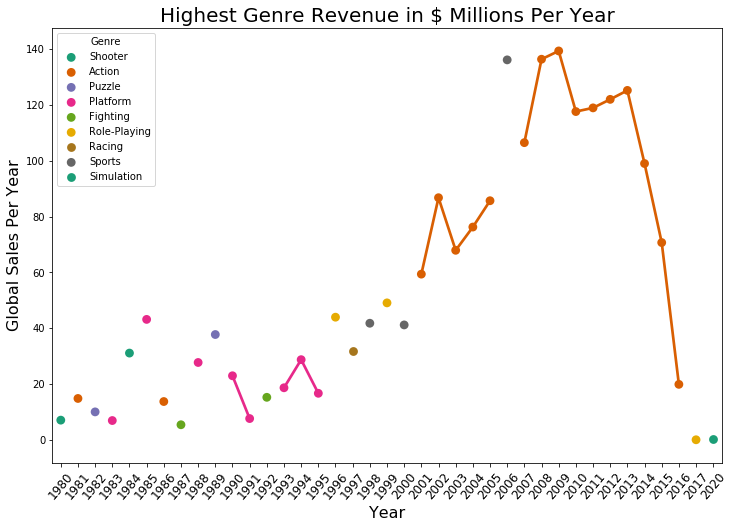

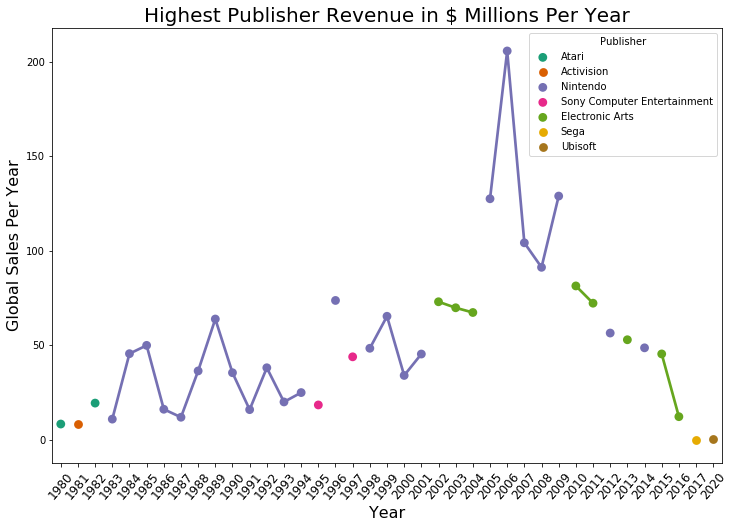

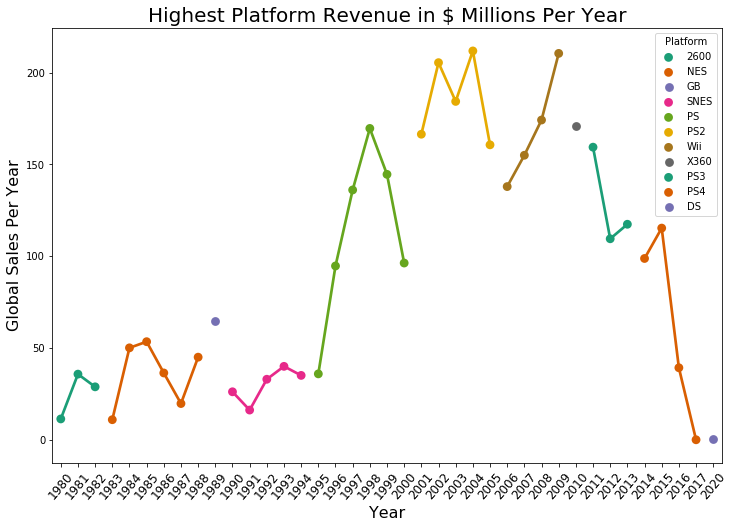

In [11]:
atts = ['Genre','Publisher','Platform']
for att in atts:
    table = data.pivot_table('Global_Sales', index=att, columns='Year', aggfunc='sum').copy(deep = True)
    genres = table.idxmax()
    sales = table.max()
    years = table.columns.astype(int)
    show_data = pd.concat([genres, sales], axis=1)
    show_data.columns = [att, 'Global Sales']

    plt.figure(figsize=(12,8))
    ax = sns.pointplot(y = 'Global Sales', x = years, hue=att, data=show_data, size=15, palette='Dark2')
    ax.set_xlabel(xlabel='Year', fontsize=16)
    ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
    ax.set_title(label='Highest '+att+ ' Revenue in $ Millions Per Year', fontsize=20)
    ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
    plt.show()

2000年以前各种游戏类型竞相绽放，而近些年动作类游戏持续占领市场，且销售量接连创新纪录，因此选择开发动作类游戏风险更小

发行者任天堂从83年到09年基本上一直都是最受欢迎的发行者，近些年统治力逐渐下降，雅达利有着较为可观的前景

游戏平台的变迁可以看出非常有特色，每个受欢迎的平台基本都会蝉联若干年，而且一旦被淘汰就不会再火起来，目前比较火的当属PS4游戏平台

综上，团队可以开发动作类游戏，选择雅达利发行商以及PS4游戏平台